# CAPSTONE PROJECT-3 :- PRCP-1002-Handwritten Digits Recognition

## PROJECT TEAM ID :- PTID-CDS-jun-24-1963¶

# Problem Statement

* Task 1:-Prepare a complete data analysis report on the given data.
* Task 2:- Classify a given image of a handwritten digit into one of the 10 classes
representing integer values from 0 to 9.
* Task3:- Compare between various models and find the classifier that works better

# 1. Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Activation, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings("ignore")

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [3]:
#Checking the shape of training and testing
print("Training data shape:",x_train.shape)
print("Training labels shape:",y_train.shape)
print("Testing data shape:",x_test.shape)
print("Testing labels shape:",y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)


In [4]:
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
print(x_train.dtype)

uint8


# Insights:
* Training set has 60000 rows and 784(28*28) columns.
* Test set has 10000 rows and 784(28*28) columns.

# 2. Visualize some training Images


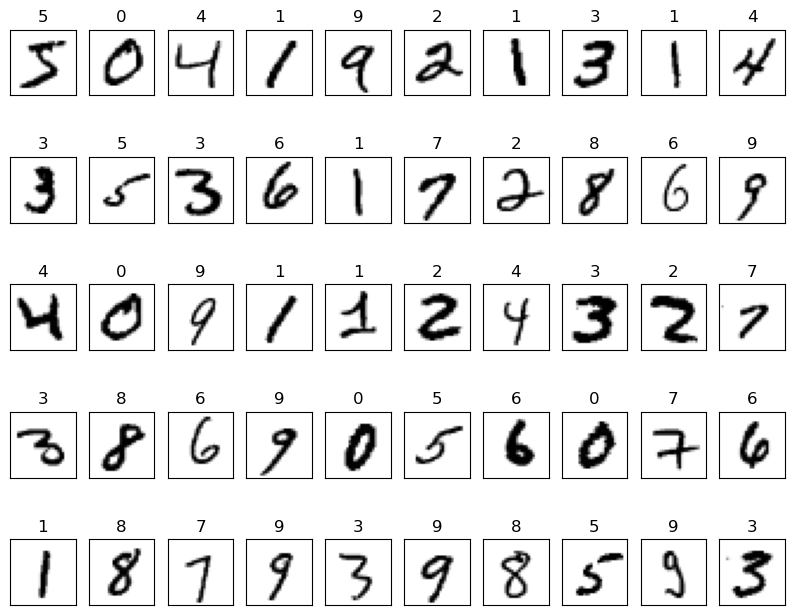

In [6]:
def visual_some_image(i):
  nplots=50
  fig=plt.figure(figsize=(10,8))
  for j in range(nplots):
    plt.subplot(5,10,j+1) #5 rows 10 columns
    plt.imshow(x_train[i+j], cmap=plt.cm.binary)
    plt.title(y_train[i+j])
    plt.xticks([])
    plt.yticks([])
  plt.show()

visual_some_image(0)

In [7]:
unique_values, counts =  np.unique(y_train, return_counts=True)
print(unique_values)
print(counts)

[0 1 2 3 4 5 6 7 8 9]
[5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


In [8]:
y_train.dtype

dtype('uint8')

# Visualize number of digits classes

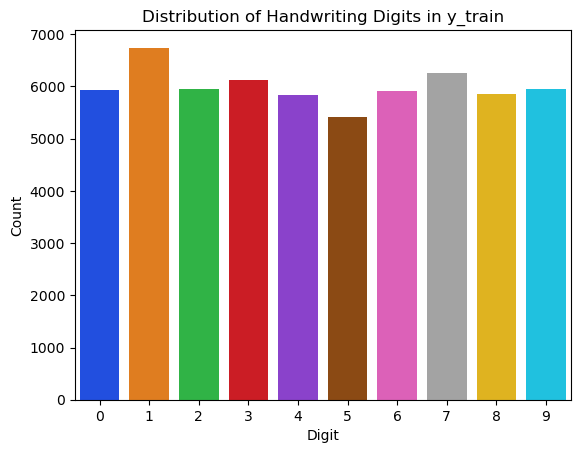

In [9]:
# Create a count plot
sns.countplot(x=y_train,palette="bright")

# Add labels and title
plt.xlabel("Digit")
plt.ylabel('Count')
plt.title('Distribution of Handwriting Digits in y_train')

# Show the plot
plt.show()

# Checking the values of each pixel

# Before Normalization

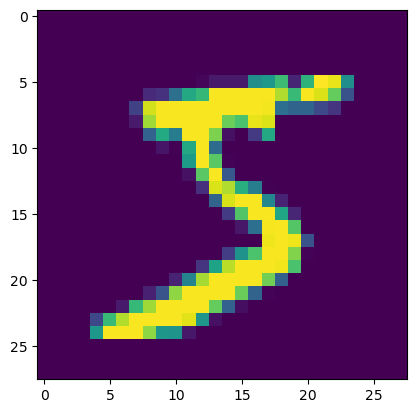

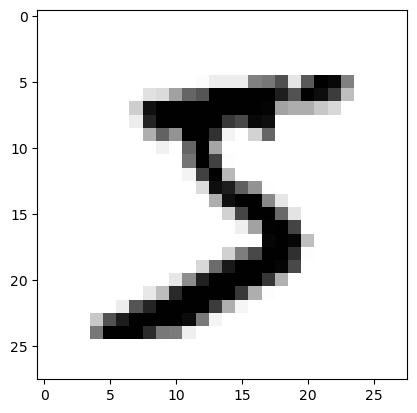

In [10]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)


In [11]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

As Images are in Gray level varies from  0 to 255, So we have to normalize it.



# Data Preprocessing

# 4. Normalizing the data

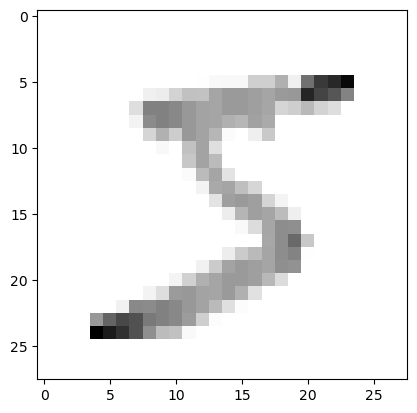

In [12]:
import tensorflow as tf
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

# After normalization

In [13]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [14]:
print(y_train[0])

5


# 5. Resizing the image to make it suitable for apply Convolutional operation

In [15]:
x_train_r = np.array(x_train).reshape(60000, 28, 28, 1)
x_test_r =np.array(x_test).reshape(10000, 28, 28, 1)
print("Training Samples dimension",x_train_r.shape)
print("Testing Samples dimension",x_test_r.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


In [16]:
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_encoded =  tf.keras.utils.to_categorical(y_test, num_classes=10)

# 6. Creating a CNN Model

In [17]:
#Creating a neural network
model = Sequential()

## 1st Convolution layer
model.add(Conv2D(64, (3, 3), input_shape=x_train_r.shape[1:], padding='same'))
model.add(Activation("relu")) ## activation function to make it non linear, <0 it will remove, and >0 it will allow to next layer.
model.add(MaxPooling2D((2, 2))) ## Max pooling get single maximum value 2*2

## 2nd Convolution layer
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(Activation("relu"))

## 3rd convolution layer
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(Activation("relu"))

## 1st Fully connected layer
model.add(Flatten())# before using fully connected layer we have to do flatten so that it convert 2D to 1D
model.add(Dense(256))
model.add(Activation("relu"))

## 2nd Fully connected layer
model.add(Dense(64))
model.add(Activation("relu"))

## Last Fully connected layer, output must be equal to number of classes,10 (0 to9)
model.add(Dense(10))
model.add(Activation("softmax")) ##Activation function changed to softmax (class probabilities)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 976,842 (3.73 MB)

 Trainable params: 976,842 (3.73 MB)

 Non-trainable params: 0 (0.00 B)

## 7. Compile the Model

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# 8. Train the Model

In [19]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint('model_checkpoint.keras', monitor="val_loss",verbose=1, save_best_only=True)
history=model.fit(x_train_r, y_train_encoded, epochs=5, validation_split=0.3, callbacks=[checkpointer], verbose=1, batch_size=32)

Epoch 1/5
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8484 - loss: 0.4555
Epoch 1: val_loss improved from inf to 0.06518, saving model to model_checkpoint.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 80s 59ms/step - accuracy: 0.8486 - loss: 0.4551 - val_accuracy: 0.9811 - val_loss: 0.0652
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9831 - loss: 0.0569
Epoch 2: val_loss did not improve from 0.06518
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 77s 59ms/step - accuracy: 0.9831 - loss: 0.0568 - val_accuracy: 0.9628 - val_loss: 0.1274
Epoch 3/5
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9879 - loss: 0.0391
Epoch 3: val_loss did not improve from 0.06518
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 77s 59ms/step - accuracy: 0.9879 - loss: 0.0391 - val_accuracy: 0.9818 - val_loss: 0.0693
Epoch 4/5
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9928 - loss: 0.0236
Epoch 4: val_loss did not improve from 0.06518
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 84s 64ms/step - accuracy: 

In [20]:
loaded_model=tf.keras.models.load_model('model_checkpoint.keras')


In [21]:
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,953,686 (7.45 MB)

 Trainable params: 976,842 (3.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 976,844 (3.73 MB)

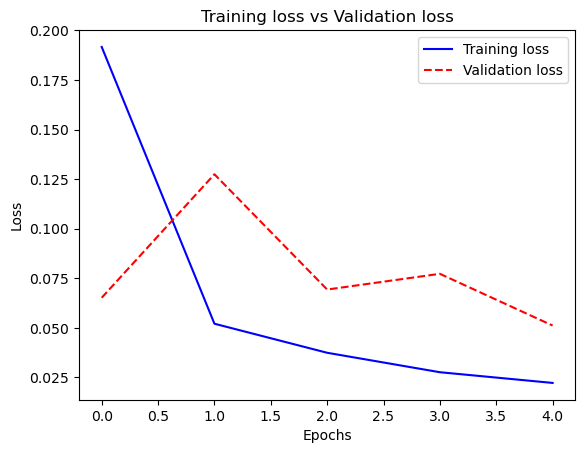

In [22]:
plt.plot(history.history['loss'], color='b', label='Training loss')
plt.plot(history.history['val_loss'], 'r--', label='Validation loss')
plt.title('Training loss vs Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 9. Model Evaluation

In [23]:
test_loss, test_acc=model.evaluate(x_test_r,y_test_encoded)
print('Test loss on 10000 test samples: ',test_loss)
print('Validation_Accuracy on test samples', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1885s 6s/step - accuracy: 0.9878 - loss: 0.0566
Test loss on 10000 test samples:  0.048093151301145554
Validation_Accuracy on test samples 0.9894000291824341


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


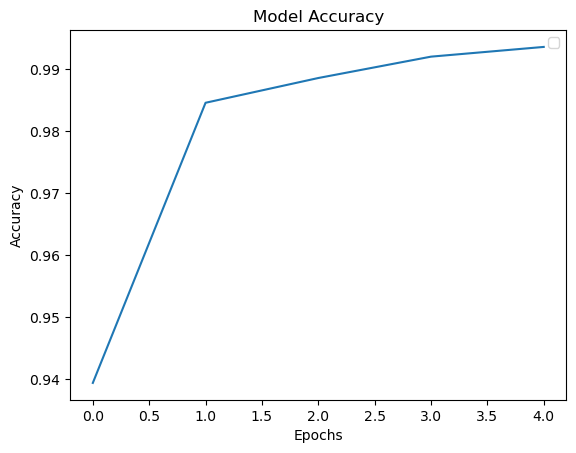

In [24]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


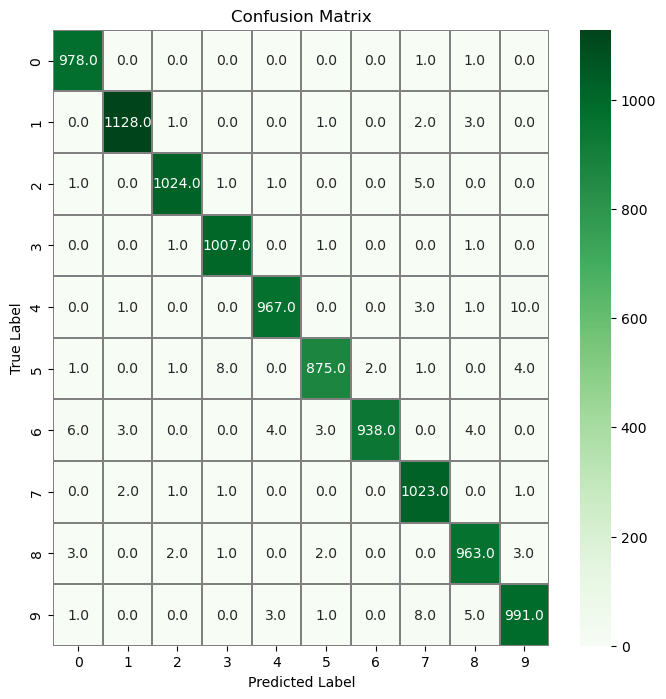

In [25]:
# confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset
Y_pred = model.predict(x_test_r)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test_encoded,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [26]:
print(Y_pred)

[[2.97170011e-15 1.89552263e-10 1.28706846e-11 ... 1.00000000e+00
  2.77840874e-13 1.45264092e-10]
 [2.66096363e-13 3.20434738e-12 1.00000000e+00 ... 1.89074186e-14
  7.01282836e-14 3.01329904e-14]
 [1.50229518e-08 9.99996543e-01 7.57751479e-07 ... 9.84553935e-07
  1.40989613e-07 3.71958720e-07]
 ...
 [7.79175613e-15 2.66275240e-12 2.46333006e-11 ... 2.93221247e-09
  2.00779171e-10 1.57101354e-08]
 [3.29642692e-14 4.64633623e-16 4.92334592e-19 ... 6.75763395e-12
  2.23625840e-11 8.34891462e-11]
 [3.65265578e-07 3.10482329e-09 2.04638315e-08 ... 1.07057724e-10
  1.65496861e-08 1.06724913e-08]]


In [27]:
print(np.argmax(Y_pred[0]))

7


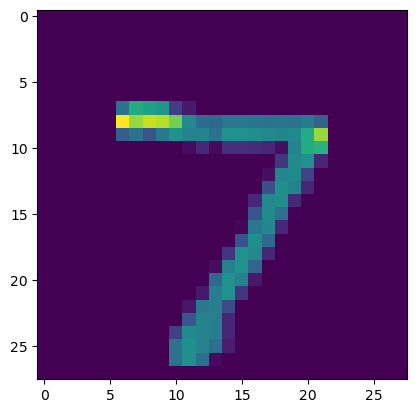

In [28]:
plt.imshow(x_test[0])
plt.show()

In [29]:
print(np.argmax(Y_pred[142]))

3


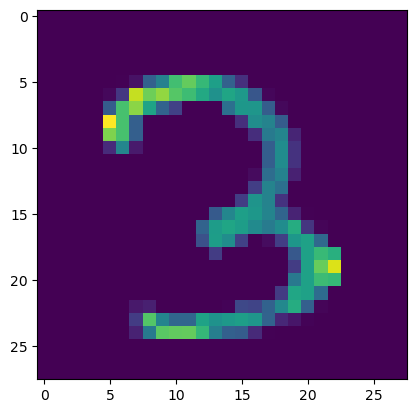

In [30]:
plt.imshow(x_test[142])
plt.show()

In [31]:
pred_digits_test=np.argmax(model.predict(x_test_r),axis=1)
image_id_test=[]
for i in range (len(pred_digits_test)):
    image_id_test.append(i+1)
d={'ImageId':image_id_test,'Label':pred_digits_test}
answer=pd.DataFrame(d)
answer.to_csv('result_0601_1401.csv',index=False)



313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


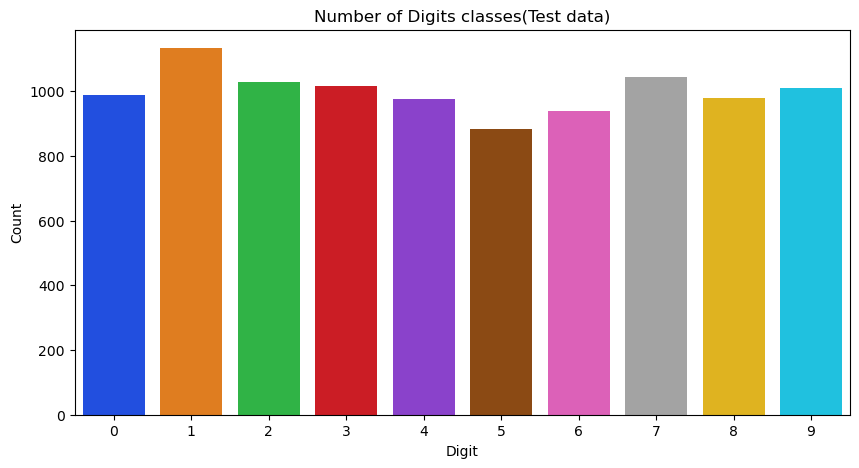

In [32]:
plt.figure(figsize=(10,5))
# Create a count plot
sns.countplot(x = pred_digits_test,palette="bright")

# Add labels and title
plt.xlabel("Digit")
plt.ylabel('Count')
plt.title("Number of Digits classes(Test data)")

# Show the plot
plt.show()

# 2. KNN

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [35]:
#Checking the shape of training and testing
print("Training data shape:",x_train.shape)
print("Training labels shape:",y_train.shape)
print("Testing data shape:",x_test.shape)
print("Testing labels shape:",y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)


# Flatten the images

In [3]:
x_train_re=x_train.reshape(x_train.shape[0],-1)
x_test_re=x_test.reshape(x_test.shape[0],-1)

In [4]:
x_train_re.shape

(60000, 784)

In [5]:
x_test_re.shape

(10000, 784)

# Data Preprocessing

In [6]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train_re)
x_test_scaled= scaler.transform(x_test_re)

In [40]:
x_train_scaled.shape

(60000, 784)

In [41]:
x_test_scaled.shape

(10000, 784)

In [7]:
#Ensure y_train and y_test are 1D arrays.
if len(y_train.shape)!=1:
    y_train = y_train.ravel()
if len(y_test.shape)!=1:
    y_test = y_test.ravel()

In [8]:
print("Shape of y_train:", y_train.shape)
print(f'Shape of y_test: {y_test.shape}')

Shape of y_train: (60000,)
Shape of y_test: (10000,)


# Model Building

In [44]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
y_pred=knn.predict(x_test_scaled)

In [46]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# Model Evaluation:

# Accuracy

In [47]:
acc=accuracy_score(y_test,y_pred)
print("Accuracy", acc)

Accuracy 0.9452


# Classification Report

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.95      0.99      0.97      1135
           2       0.95      0.94      0.94      1032
           3       0.92      0.95      0.94      1010
           4       0.95      0.94      0.95       982
           5       0.93      0.93      0.93       892
           6       0.97      0.97      0.97       958
           7       0.94      0.93      0.93      1028
           8       0.96      0.90      0.93       974
           9       0.93      0.92      0.92      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.94      0.94     10000
weighted avg       0.95      0.95      0.95     10000



# Confusion Matrix

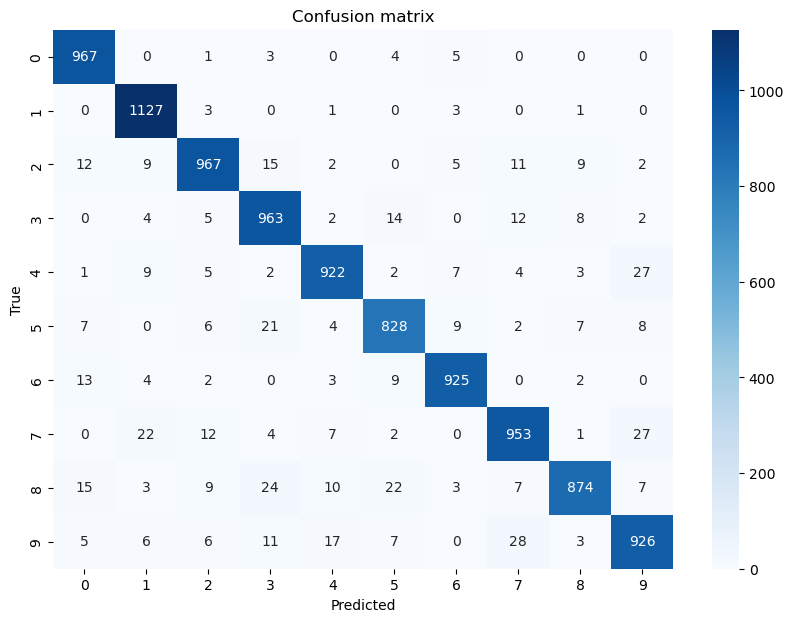

In [49]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix")
plt.show()

# Hyperparameter Tuning

In [50]:
from sklearn.model_selection import GridSearchCV
param_grid={"n_neighbors": np.arange(1,10) }
knn_gscv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_gscv.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [51]:
print("Best parameters found:", knn_gscv.best_params_)

Best parameters found: {'n_neighbors': 3}


In [52]:
#Train with best parameters
best_knn = knn_gscv.best_estimator_
y_pred_best = best_knn.predict(x_test_scaled)

# Model Evaluation

In [53]:
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model Confusion_Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Best Model Classification report:\n", classification_report(y_test, y_pred_best))

Best Model Accuracy: 0.9452
Best Model Confusion_Matrix:
 [[ 967    0    1    3    0    4    5    0    0    0]
 [   0 1127    3    0    1    0    3    0    1    0]
 [  12    9  967   15    2    0    5   11    9    2]
 [   0    4    5  963    2   14    0   12    8    2]
 [   1    9    5    2  922    2    7    4    3   27]
 [   7    0    6   21    4  828    9    2    7    8]
 [  13    4    2    0    3    9  925    0    2    0]
 [   0   22   12    4    7    2    0  953    1   27]
 [  15    3    9   24   10   22    3    7  874    7]
 [   5    6    6   11   17    7    0   28    3  926]]
Best Model Classification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.95      0.99      0.97      1135
           2       0.95      0.94      0.94      1032
           3       0.92      0.95      0.94      1010
           4       0.95      0.94      0.95       982
           5       0.93      0.93      0.93       8

### Support Vector Machine

In [9]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train_scaled,y_train)

SVC()

In [10]:
y_predict=svm.predict(x_test_scaled)

In [11]:
y_predict

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### Accuracy

In [57]:
acc_svm=accuracy_score(y_test,y_predict)
print("Accuracy", acc_svm)

Accuracy 0.966


### classification report

In [58]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.96      0.96      0.96       892
           6       0.98      0.97      0.98       958
           7       0.93      0.96      0.94      1028
           8       0.96      0.95      0.96       974
           9       0.97      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



### Confusion Matrix

In [59]:
cm1=pd.crosstab(y_test,y_predict)
cm1

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,968,0,1,1,0,3,3,2,2,0
1,0,1127,3,0,0,1,2,0,2,0
2,5,1,996,2,2,0,1,15,9,1
3,0,0,4,979,1,7,0,12,7,0
4,0,0,12,0,944,2,4,7,3,10
5,2,0,1,10,2,854,6,8,7,2
6,6,2,1,0,4,8,930,2,5,0
7,1,6,13,2,3,0,0,990,0,13
8,3,0,4,6,6,9,3,14,926,3


### F1 Score

In [60]:
f1=f1_score(y_test,y_predict,average="macro")
f1

0.9657584887464468

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 5, 10,50,60,70],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'random_state':(list(range(1, 20)))}
model=SVC()
grid_svm = GridSearchCV(model, param_grid, refit = True, verbose = 2,scoring='f1',cv=5)

# fitting the model for grid search
grid_svm.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 570 candidates, totalling 2850 fits


In [ ]:
print(grid_svm.best_params_)

In [ ]:
print(grid_svm.best_estimator_)

## Conclusion:-




 ### CNN:

* Pros: Automatically learn features from images, usually achieve higher accuracy, effective for large datasets.
* Cons: Require more computational resources and time to train, need careful tuning of hyperparameters.

### KNN:

* Pros: Simple to implement, easy to understand, performs well with smaller datasets.
* Cons: Less efficient with larger datasets and high-dimensional data, accuracy can be lower compared to CNNs.

### SVM:

* Pros: Effective in high dimensional spaces, Robustness to Overfitting,good performance with small to medium sized Datasets.
* Cons: Computationally expensive, Memory consumption, scalability issues and less effective with noisy data.

* In summary, while KNN can be effective and provide good results with a high accuracy of 0.9462, CNNs are generally the better choice for handwritten digit recognition, especially when aiming for state-of-the-art performance.


### CHALLENGES FACED

* Challenges include data quality, model tuning, computational resources, overfitting/underfitting, scalability, and evaluation metrics.